        NMDS1     NMDS2 type                        FlowCamID regionYear
0   -0.400747 -0.060318   CI      21_10_05_NL_S1_Z17_0752_250    NL 2021
1   -0.403923 -0.092932   HI      21_10_05_NL_S1_Z17_0752_250    NL 2021
2   -0.380804 -0.085279   HM      21_10_05_NL_S1_Z17_0752_250    NL 2021
3   -0.280679 -0.115318   CI      21_10_05_NL_S1_Z17_1406_250    NL 2021
4   -0.354397 -0.072826   HI      21_10_05_NL_S1_Z17_1406_250    NL 2021
..        ...       ...  ...                              ...        ...
115  0.577331  0.704147   HI  AMMP_PA_S04W20_20210609LT_250um    Pacific
116  0.534846  0.741902   HM  AMMP_PA_S04W20_20210609LT_250um    Pacific
117  0.505039  0.578968   CI  AMMP_PA_S04W20_20210610LT_250um    Pacific
118  0.460444  0.474905   HI  AMMP_PA_S04W20_20210610LT_250um    Pacific
119  0.483252  0.534061   HM  AMMP_PA_S04W20_20210610LT_250um    Pacific

[120 rows x 5 columns]


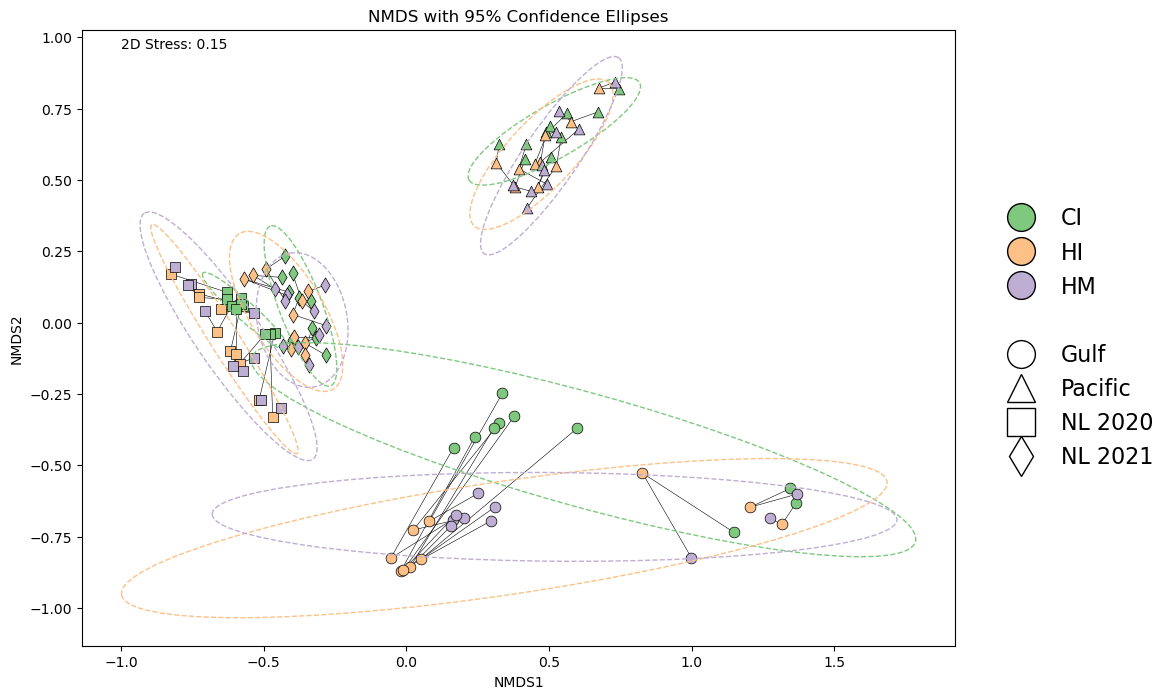

In [2]:
#CODE FOR PRODUCING THE NMDS WITH ELLIPSES. IT REQUIRES COORDINATE POINTS IN A SPREASHEET (CALCULATED IN R).

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from scipy.stats import chi2
from matplotlib.patches import Ellipse
from matplotlib.lines import Line2D
# Example: Let's assume you already have an NMDS result in `df`
# Assume df has the NMDS coordinates (NMDS1, NMDS2) and the grouping variables ('type', 'regionYear')


coords_data = pd.read_excel('nmds_coords.xlsx')
print(coords_data)


# Function to calculate and plot the confidence ellipse for each group
def plot_confidence_ellipses(df, confidence_level=0.95):
    # Set up the figure
    plt.figure(figsize=(15, 8))
    marker_dict = {'Gulf': 'o', 'Pacific': '^', 'NL 2020': 's', 'NL 2021': 'd'}
    # ['#75ba75', '#fec76f', '#be95be']
    color_dict = {'CI': '#7fc97f', 'HI': '#fdc086', 'HM': '#beaed4'}
    markers = []
    for i, row in df.iterrows():
        markers.append(marker_dict[row['regionYear']])
    
    # Get unique combinations of type and regionYear
    group_cols = ['regionYear','type']

    lastSample = ''
    for group, group_data in df.groupby(['FlowCamID', 'type']):
        sample = group[0]
        coords = group_data[['NMDS1', 'NMDS2']].values
        # print(coords)
        addLine = True
        if sample != lastSample:
            addLine = False
        lastSample = group[0]
        # print(addLine)
        if addLine:
            line = Line2D([coords[0][0], last_coords[0][0]], [coords[0][1], last_coords[0][1]], color='black', linewidth=.4, linestyle='-', zorder=1, label="Line Segment")
            plt.gca().add_line(line)
        last_coords = group_data[['NMDS1', 'NMDS2']].values
    
    for group, group_data in df.groupby(group_cols):

        # Get the NMDS coordinates for the group
        coords = group_data[['NMDS1', 'NMDS2']].values

        # Calculate the covariance matrix
        cov_matrix = np.cov(coords.T)
        
        # Calculate the eigenvalues and eigenvectors of the covariance matrix
        eigvals, eigvecs = np.linalg.eigh(cov_matrix)
        
        # For a 95% confidence ellipse, use chi-squared value for 2D
        chi_square_val = chi2.ppf(confidence_level, df=2)
        
        # Calculate the axes of the ellipse (major and minor)
        axis_length = np.sqrt(eigvals * chi_square_val)
        width, height = axis_length
        
        # Calculate the angle of rotation of the ellipse
        angle = np.arctan2(eigvecs[1, 0], eigvecs[0, 0]) * 180 / np.pi
        
        # Ellipse properties
        ellipse = Ellipse(xy=np.mean(coords, axis=0), width=2*width, height=2*height,
                          angle=angle, facecolor='none', edgecolor=color_dict[group[1]], alpha=1, zorder=3, linestyle='--')
        
        # Plot the points and the ellipse
        plt.scatter(coords[:, 0], coords[:, 1], marker=marker_dict[group[0]], edgecolor='black', linewidths = .5, s=60, color=color_dict[group[1]], zorder=2, label=f"{group[0]} - {group[1]}")
        plt.gca().add_patch(ellipse)


    plt.title("NMDS with 95% Confidence Ellipses")
    plt.xlabel("NMDS1")
    plt.ylabel("NMDS2")
    # plt.legend()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.text(-1, 1, '2D Stress: 0.15', horizontalalignment='left', verticalalignment='top')
    legend_handles = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict['CI'], markersize=20, markeredgecolor='black', label='CI'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict['HI'], markersize=20, markeredgecolor='black', label='HI'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict['HM'], markersize=20, markeredgecolor='black', label='HM'),
        Line2D([0], [0], color='w', label=''),  # Blank line
        Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=20, markeredgecolor='black', label='Gulf'),
        Line2D([0], [0], marker='^', color='w', markerfacecolor='white', markersize=20, markeredgecolor='black', label='Pacific'),
        Line2D([0], [0], marker='s', color='w', markerfacecolor='white', markersize=20, markeredgecolor='black', label='NL 2020'),
        Line2D([0], [0], marker='d', color='w', markerfacecolor='white', markersize=20, markeredgecolor='black', label='NL 2021'),
    ]
    
    # Add the custom legend
    plt.legend(handles=legend_handles, loc='right', bbox_to_anchor=(1.25, 0.5), fontsize=16, frameon=False)
    # plt.grid(True)
    plt.show()

# Call the function
plot_confidence_ellipses(coords_data)


       NMDS1     NMDS2 type                              FlowCamID
0  -1.136057 -0.149567   CI  AMMP_Gulf_StPeters_1_20200903HT_250UM
1  -1.243991 -0.187935   HI  AMMP_Gulf_StPeters_1_20200903HT_250UM
2  -1.309070 -0.065459   HM  AMMP_Gulf_StPeters_1_20200903HT_250UM
3   0.174836 -0.007327   CI  AMMP_Gulf_StPeters_1_20200903LT_250UM
4   0.566059 -0.124386   HI  AMMP_Gulf_StPeters_1_20200903LT_250UM
5   0.466542  0.334673   HM  AMMP_Gulf_StPeters_1_20200903LT_250UM
6  -1.179188 -0.087531   CI  AMMP_Gulf_StPeters_1_20200904HT_250UM
7  -1.257961 -0.092353   HI  AMMP_Gulf_StPeters_1_20200904HT_250UM
8  -1.103693  0.292658   HM  AMMP_Gulf_StPeters_1_20200904HT_250UM
9   0.326993 -0.289929   CI   AMMP_Gulf_StPeters_2B_20200903_250UM
10  0.607000 -0.426026   HI   AMMP_Gulf_StPeters_2B_20200903_250UM
11  0.498262  0.588738   HM   AMMP_Gulf_StPeters_2B_20200903_250UM
12  0.162287 -0.091405   CI  AMMP_Gulf_StPeters_2_20200903HT_250UM
13  0.585752 -0.232581   HI  AMMP_Gulf_StPeters_2_20200903HT_2

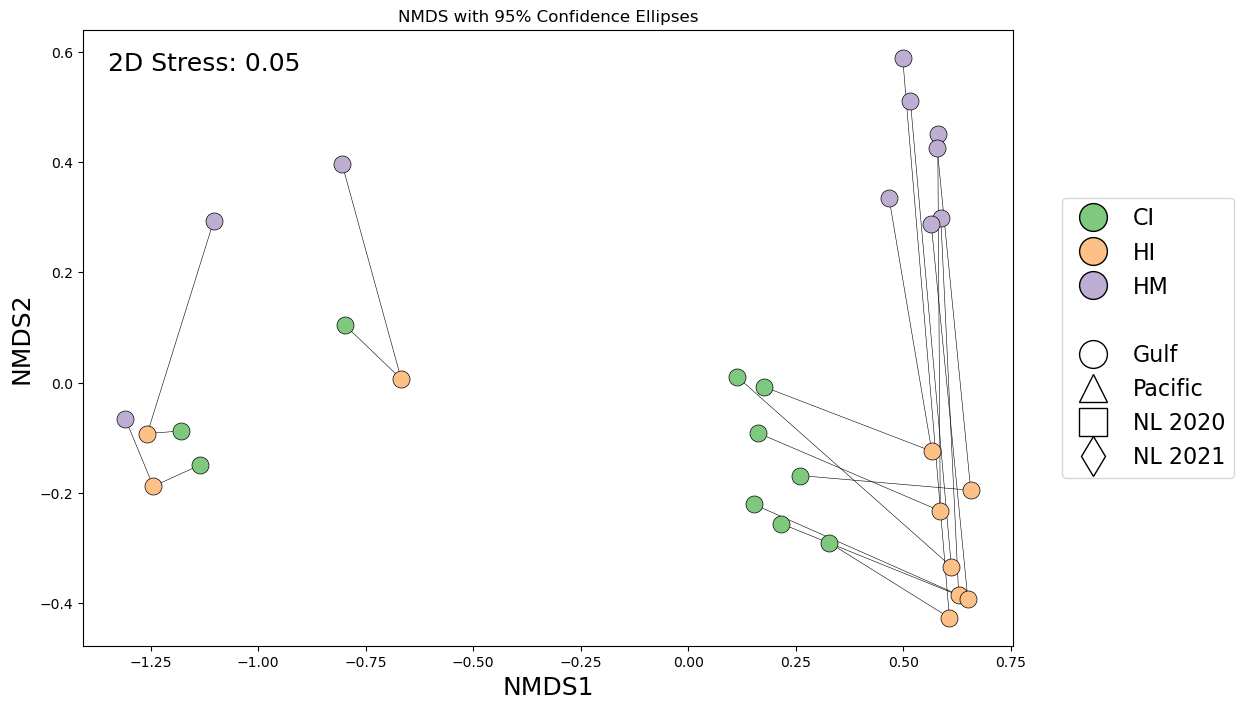

In [3]:
coords_data = pd.read_excel('Gulf_max_nmds_coords.xlsx')
print(coords_data)
# Example DataFrame (replace with your actual data)

# Function to calculate and plot the confidence ellipse for each group
def plot_confidence_ellipses(df, regionYear, confidence_level=0.95):
    # Set up the figure
    plt.figure(figsize=(12, 8))
    marker_dict = {'Gulf': 'o', 'Pacific': '^', 'NL 2020': 's', 'NL 2021': 'd'}
    # ['#75ba75', '#fec76f', '#be95be']
    color_dict = {'CI': '#7fc97f', 'HI': '#fdc086', 'HM': '#beaed4'}
    markers = []
 
    # Get unique combinations of type and regionYear
    group_cols = ['type']

    lastSample = ''
    for group, group_data in df.groupby(['FlowCamID', 'type']):
        sample = group[0]
        coords = group_data[['NMDS1', 'NMDS2']].values
        # print(coords)
        addLine = True
        if sample != lastSample:
            addLine = False
        lastSample = group[0]
        # print(addLine)
        if addLine:
            line = Line2D([coords[0][0], last_coords[0][0]], [coords[0][1], last_coords[0][1]], color='black', linewidth=.4, linestyle='-', zorder=1, label="Line Segment")
            plt.gca().add_line(line)
        last_coords = group_data[['NMDS1', 'NMDS2']].values
    
    for group, group_data in df.groupby(group_cols):

        # Get the NMDS coordinates for the group
        coords = group_data[['NMDS1', 'NMDS2']].values

        # Calculate the covariance matrix
        cov_matrix = np.cov(coords.T)
        
        # Calculate the eigenvalues and eigenvectors of the covariance matrix
        eigvals, eigvecs = np.linalg.eigh(cov_matrix)
        
        # For a 95% confidence ellipse, use chi-squared value for 2D
        chi_square_val = chi2.ppf(confidence_level, df=2)
        
        # Calculate the axes of the ellipse (major and minor)
        axis_length = np.sqrt(eigvals * chi_square_val)
        width, height = axis_length
        
        # Calculate the angle of rotation of the ellipse
        angle = np.arctan2(eigvecs[1, 0], eigvecs[0, 0]) * 180 / np.pi
        
        # # Ellipse properties
        # ellipse = Ellipse(xy=np.mean(coords, axis=0), width=2*width, height=2*height,
        #                   angle=angle, facecolor='none', edgecolor=color_dict[group[1]], alpha=1, zorder=3, linestyle='--')
        
        # Plot the points and the ellipse
        plt.scatter(coords[:, 0], coords[:, 1], marker=marker_dict[regionYear], edgecolor='black', linewidths = .5, s=150, color=color_dict[group[0]], zorder=2)
        # plt.gca().add_patch(ellipse)


    plt.title("NMDS with 95% Confidence Ellipses")
    plt.xlabel("NMDS1", fontsize=18)
    plt.ylabel("NMDS2", fontsize=18)
    # plt.legend()
    # plt.gca().set_aspect('equal', adjustable='box')
    plt.text(-1.35, 0.6, '2D Stress: 0.05', horizontalalignment='left', verticalalignment='top', fontsize=18)
    legend_handles = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict['CI'], markersize=20, markeredgecolor='black', label='CI'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict['HI'], markersize=20, markeredgecolor='black', label='HI'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict['HM'], markersize=20, markeredgecolor='black', label='HM'),
        Line2D([0], [0], color='w', label=''),  # Blank line
        Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=20, markeredgecolor='black', label='Gulf'),
        Line2D([0], [0], marker='^', color='w', markerfacecolor='white', markersize=20, markeredgecolor='black', label='Pacific'),
        Line2D([0], [0], marker='s', color='w', markerfacecolor='white', markersize=20, markeredgecolor='black', label='NL 2020'),
        Line2D([0], [0], marker='d', color='w', markerfacecolor='white', markersize=20, markeredgecolor='black', label='NL 2021'),
    ]
    
    # Add the custom legend
    plt.legend(handles=legend_handles, loc='right', bbox_to_anchor=(1.25, 0.5), fontsize=16)
    # plt.grid(True)
    plt.show()

plot_confidence_ellipses(coords_data, 'Gulf')